1. "pip install" searches for the package in the Python Package Index (PyPI), downloads the package and its dependencies, and installs them in your Python environment.

2. The installation process involves downloading the package, resolving dependencies, extracting files, and performing any necessary setup steps, making the package available for use.

       1. !pip install numpy
       2. !pip install 
       3. !pip install statsmodels

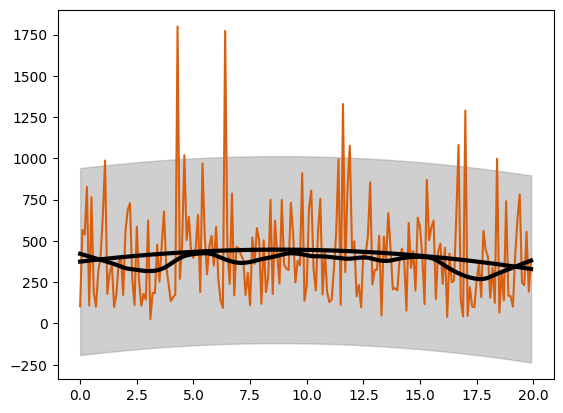

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from 0 to 20 with a step size of 0.1
x = np.arange(0, 20, 0.1)

# Generate a gamma distribution with shape=2 and scale=2
y_gamma = np.random.gamma(shape=2, scale=2, size=len(x))

# Scale the gamma distribution by multiplying by 100
y_gamma_scaled = y_gamma * 100

# Generate y values by adding Gaussian noise to the scaled gamma distribution
y_norm = np.zeros_like(y_gamma_scaled)
for i in range(len(y_norm)):
    y_norm[i] = np.random.normal(loc=y_gamma_scaled[i], scale=2)

# Create a 2D array combining x and y values
data = np.column_stack((x, y_norm))

# Plot the data points
plt.plot(data[:, 0], data[:, 1], color='#d95f0e', linewidth=1.5)

# Fit a lowess curve to the data
from statsmodels.nonparametric.smoothers_lowess import lowess
lo_fit_gamma = lowess(y_norm, x, frac=1/5)
plt.plot(x, lo_fit_gamma[:, 1], color='black', linewidth=3)

# Fit a loess curve to the data using an OLS model
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.api import OLS
loess_fit = OLS(y_norm, np.column_stack((np.ones_like(x), x, x**2))).fit()
plt.plot(x, loess_fit.fittedvalues, color='black', linewidth=3)

# Calculate the confidence interval
se = np.sqrt(np.sum(loess_fit.resid**2) / loess_fit.df_resid)
t = 1.96  # 95% confidence interval
ci_upper = loess_fit.fittedvalues + t * se
ci_lower = loess_fit.fittedvalues - t * se

# Plot the confidence interval
plt.fill_between(x, ci_lower, ci_upper, color='#99999977')

# Set the x and y axis labels to empty strings
plt.xlabel('')
plt.ylabel('')

# Display the plot
plt.show()


In [11]:
# Generate x values from 0 to 20 with a step size of 0.1
x = np.arange(0, 20, 0.1)
print(x)
len(x)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

200

In [12]:
# Generate a gamma distribution with shape=2 and scale=2
y_gamma = np.random.gamma(shape=2, scale=2, size=len(x))
print(y_gamma)
len(y_gamma)

[ 1.03749333  3.73063836  1.48118479  4.0491529   0.75463653  7.55578908
  8.28572891 10.27965913  0.05387069  2.08673905  3.1494686   1.87551295
  0.42860401 16.98407715  9.99125495  5.5507693   0.62516252  1.35955791
  1.76133276  0.70280872  2.74174282 10.56710128  5.10902542  2.62497919
 12.36606788  6.437427    4.34382295  3.84069754  4.57089652  6.57252437
  4.97993445  2.62577702  6.9816325   6.99932093  3.2974755   5.04881884
  2.25984361  1.01800676  4.24236919  0.50729494  4.97314858  1.82745139
  4.57925109  5.45001483  0.64348434  2.57738653  2.27327921  5.95758743
  5.90255805  7.03195308  6.21531838  3.34711454  5.4283943   6.28193655
  7.15678183  5.69009971  5.76691509  3.01676091  1.84924462  0.93559698
  3.30335644  3.51324142  4.70437157  2.55469345  9.7033995   2.02024648
  0.56065665  2.4853812   2.30187579  3.24530643  5.43297545  3.86007121
  2.08236222  7.53534811  6.13590594  2.94979967  5.21332766  7.19921546
  0.24227317  5.88800234  3.11304868  6.08197488  1

200

The probability density function (PDF) of the gamma distribution is given by:

f(x; k, θ) = (x^(k-1) * exp(-x/θ)) / (θ^k * Γ(k))

Where:

1. x is the random variable (value)
2. k is the shape parameter
3. θ is the scale parameter
4. Γ(k) is the gamma function that represents a generalization of the factorial function to non-integer values

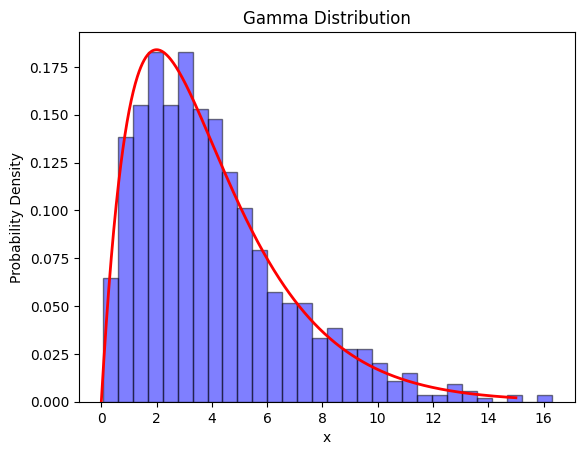

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parameters of the gamma distribution
shape = 2
scale = 2

# Generate random numbers from gamma distribution
data = gamma.rvs(shape, scale=scale, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the probability density function (PDF) of the gamma distribution
x = np.linspace(0, 15, 1000)
pdf = gamma.pdf(x, shape, scale=scale)
plt.plot(x, pdf, color='red', linewidth=2)

# Add labels and title to the plot
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gamma Distribution')

# Display the plot
plt.show()


In [19]:
# Scale the gamma distribution by multiplying by 100
y_gamma_scaled = y_gamma * 100
print(y_gamma_scaled)

[ 103.74933269  373.06383569  148.11847865  404.91529029   75.46365323
  755.57890771  828.57289095 1027.96591275    5.38706871  208.67390506
  314.94686013  187.55129546   42.86040068 1698.40771499  999.12549493
  555.07693      62.51625213  135.95579063  176.13327615   70.2808724
  274.17428177 1056.71012823  510.90254226  262.49791884 1236.60678759
  643.74270043  434.382295    384.06975423  457.08965205  657.2524371
  497.99344531  262.57770211  698.1632496   699.93209336  329.7475499
  504.88188401  225.98436054  101.80067578  424.23691902   50.72949399
  497.31485843  182.74513901  457.92510926  545.001483     64.34843447
  257.73865304  227.32792117  595.75874304  590.2558049   703.19530826
  621.5318382   334.71145414  542.83943016  628.19365482  715.67818293
  569.00997094  576.6915086   301.67609117  184.92446169   93.55969845
  330.33564362  351.32414207  470.43715728  255.46934536  970.33994977
  202.02464791   56.06566475  248.53812037  230.18757891  324.53064309
  543.297

In [21]:
# Generate y values by adding Gaussian noise to the scaled gamma distribution
# "loc" represents the mean or average value of the normal distribution.
# "scale" is the standard deviation of the normal distribution
y_norm = np.zeros_like(y_gamma_scaled)
for i in range(len(y_norm)):
    y_norm[i] = np.random.normal(loc=y_gamma_scaled[i], scale=2)
    print(y_norm[i])

108.22045213006673
373.05396525994007
145.6757822407633
406.1879595365352
71.99682478400335
756.6201375698246
829.4653749526549
1032.0621760694587
5.839344117601948
208.6510845724631
317.09229717445544
187.06499818503974
44.52145208768896
1696.6851936870203
997.9959384455135
553.4492073955446
60.257907867355144
137.57041086029474
178.29077556758983
71.89790379827147
276.989014254541
1057.1167819550312
511.6245703601572
261.5907001049301
1236.67025664315
645.8470060077547
435.759828185165
378.97110249503334
455.0834251385769
657.2207050583892
498.38792804348253
267.63346289537554
699.121502459093
697.7834716919699
328.54815787839925
503.1802538530839
228.34953590092294
97.93493531702454
424.0651108141411
54.53350483847399
496.7349252489522
182.22473308244201
461.11905860699784
545.0946366684173
66.2130882670406
259.71121492264524
225.18316472657247
597.4307722447704
592.5939495035451
702.7885634539875
620.1882170626656
333.6169339529314
544.5803333595335
627.4417985506101
712.2798803509

In [25]:
# Generate x values from 0 to 20 with a step size of 0.1
x = np.arange(0, 20, 0.1)

# Generate a gamma distribution with shape=2 and scale=2
y_gamma = np.random.gamma(shape=2, scale=2, size=len(x))

# Scale the gamma distribution by multiplying by 100
y_gamma_scaled = y_gamma * 100

# Generate y values by adding Gaussian noise to the scaled gamma distribution
y_norm = np.zeros_like(y_gamma_scaled)
print(y_norm)
for i in range(len(y_norm)):
    y_norm[i] = np.random.normal(loc=y_gamma_scaled[i], scale=2)

# Create a 2D array combining x and y values
data = np.column_stack((x, y_norm))
data

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


array([[0.00000000e+00, 5.63590908e+02],
       [1.00000000e-01, 2.02096242e+02],
       [2.00000000e-01, 7.65173121e+02],
       [3.00000000e-01, 2.71983288e+02],
       [4.00000000e-01, 6.54116654e+02],
       [5.00000000e-01, 9.14614911e+01],
       [6.00000000e-01, 2.30816008e+02],
       [7.00000000e-01, 4.26892071e+02],
       [8.00000000e-01, 1.27534011e+02],
       [9.00000000e-01, 3.91028424e+02],
       [1.00000000e+00, 4.77279589e+02],
       [1.10000000e+00, 8.07526949e+02],
       [1.20000000e+00, 6.21995953e+02],
       [1.30000000e+00, 4.81235120e+02],
       [1.40000000e+00, 5.25355652e+02],
       [1.50000000e+00, 3.57505873e+02],
       [1.60000000e+00, 2.92097882e+02],
       [1.70000000e+00, 2.91578861e+02],
       [1.80000000e+00, 1.22606150e+02],
       [1.90000000e+00, 1.35836200e+03],
       [2.00000000e+00, 2.20597754e+03],
       [2.10000000e+00, 2.10165326e+02],
       [2.20000000e+00, 6.23500731e+02],
       [2.30000000e+00, 8.45818990e+02],
       [2.400000

The plot() function is then used to plot these data points. The first argument data[:, 0] specifies the x-coordinates of the data points, and data[:, 1] specifies the y-coordinates.

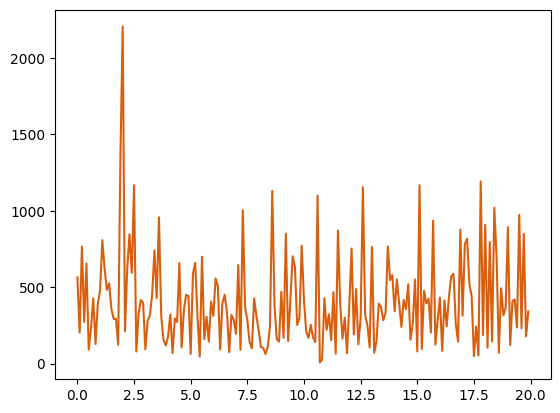

In [26]:
# Plot the data points
plt.plot(data[:, 0], data[:, 1], color='#d95f0e', linewidth=1.5)